In [64]:
# Import the dependencies.
import pandas as pd
import numpy as np

from scipy.stats import linregress
import matplotlib.pyplot as plt

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

In [65]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [66]:
coordinates = list(lat_lngs)

In [67]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [68]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in the list.
set_count = 1
record_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = "http://api.openweathermap.org/data/2.5/weather?&q=" + city.replace(" ","+") + "&units=Imperial&APPID="+ weather_api_key 

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ahipara
Processing Record 2 of Set 1 | svetlyy
Processing Record 3 of Set 1 | popondetta
Processing Record 4 of Set 1 | kolchugino
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | boyuibe
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | raudeberg
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | bolobo
Processing Record 16 of Set 1 | menongue
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | nogales
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | marcona
City not found. Skipping...
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of

Processing Record 36 of Set 4 | faya
Processing Record 37 of Set 4 | tura
Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | sept-iles
Processing Record 40 of Set 4 | beaufort
Processing Record 41 of Set 4 | qandala
Processing Record 42 of Set 4 | ternovka
Processing Record 43 of Set 4 | torrevieja
Processing Record 44 of Set 4 | hilo
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | brae
Processing Record 48 of Set 4 | jiddah
City not found. Skipping...
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | launceston
Processing Record 4 of Set 5 | chinsali
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | igarka
Processing Record 7 of Set 5 | norman wells
Processing Record 8 of Set 5 | codrington
Processing Record 9 of Set 5 | iluliss

City not found. Skipping...
Processing Record 28 of Set 8 | senmonorom
City not found. Skipping...
Processing Record 29 of Set 8 | samusu
City not found. Skipping...
Processing Record 30 of Set 8 | dabakala
Processing Record 31 of Set 8 | goderich
Processing Record 32 of Set 8 | gloucester
Processing Record 33 of Set 8 | klaksvik
Processing Record 34 of Set 8 | husavik
Processing Record 35 of Set 8 | ambilobe
Processing Record 36 of Set 8 | sampit
Processing Record 37 of Set 8 | pinhao
Processing Record 38 of Set 8 | cuamba
Processing Record 39 of Set 8 | mulege
Processing Record 40 of Set 8 | tabou
Processing Record 41 of Set 8 | jiuquan
Processing Record 42 of Set 8 | saint-leu
Processing Record 43 of Set 8 | tarudant
City not found. Skipping...
Processing Record 44 of Set 8 | toppenish
Processing Record 45 of Set 8 | yangjiang
Processing Record 46 of Set 8 | mahibadhoo
Processing Record 47 of Set 8 | puri
Processing Record 48 of Set 8 | lufilufi
Processing Record 49 of Set 8 | lawre

Processing Record 18 of Set 12 | plettenberg bay
Processing Record 19 of Set 12 | damara
Processing Record 20 of Set 12 | pingliang
Processing Record 21 of Set 12 | poum
Processing Record 22 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 23 of Set 12 | ilo
Processing Record 24 of Set 12 | pangody
Processing Record 25 of Set 12 | kenai
Processing Record 26 of Set 12 | tagusao
Processing Record 27 of Set 12 | grand gaube
Processing Record 28 of Set 12 | los llanos de aridane
Processing Record 29 of Set 12 | nyuksenitsa
Processing Record 30 of Set 12 | weinan
Processing Record 31 of Set 12 | saint-francois
Processing Record 32 of Set 12 | marienburg
Processing Record 33 of Set 12 | manggar
Processing Record 34 of Set 12 | salt
Processing Record 35 of Set 12 | vao
Processing Record 36 of Set 12 | labuhan
Processing Record 37 of Set 12 | tazovskiy
Processing Record 38 of Set 12 | careiro da varzea
Processing Record 39 of Set 12 | nome
Processing Record 40 of Set 12 | rawson
Process

In [79]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ahipara,-35.17,173.17,62.20,77,52,12.39,NZ,2020-08-23 00:26:40
1,Svetlyy,54.67,20.13,68.00,94,75,6.71,RU,2020-08-23 00:26:40
2,Popondetta,-8.75,148.25,88.83,55,39,2.26,PG,2020-08-23 00:26:40
3,Kolchugino,56.30,39.38,53.53,87,51,2.04,RU,2020-08-23 00:26:41
4,Saint-Philippe,-21.36,55.77,68.00,55,36,8.05,RE,2020-08-23 00:26:41
5,Vardo,70.37,31.11,56.82,87,54,20.13,NO,2020-08-23 00:26:41
6,Albany,42.60,-73.97,80.01,55,0,1.99,US,2020-08-23 00:25:02
7,Puerto Ayora,-0.74,-90.35,64.99,93,78,5.99,EC,2020-08-23 00:26:41
8,Isangel,-19.55,169.27,84.20,66,20,11.41,VU,2020-08-23 00:26:42
9,Boyuibe,-20.42,-63.28,49.93,45,28,3.53,BO,2020-08-23 00:26:42


In [80]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ahipara,NZ,2020-08-23 00:26:40,-35.17,173.17,62.20,77,52,12.39
1,Svetlyy,RU,2020-08-23 00:26:40,54.67,20.13,68.00,94,75,6.71
2,Popondetta,PG,2020-08-23 00:26:40,-8.75,148.25,88.83,55,39,2.26
3,Kolchugino,RU,2020-08-23 00:26:41,56.30,39.38,53.53,87,51,2.04
4,Saint-Philippe,RE,2020-08-23 00:26:41,-21.36,55.77,68.00,55,36,8.05
5,Vardo,NO,2020-08-23 00:26:41,70.37,31.11,56.82,87,54,20.13
6,Albany,US,2020-08-23 00:25:02,42.60,-73.97,80.01,55,0,1.99
7,Puerto Ayora,EC,2020-08-23 00:26:41,-0.74,-90.35,64.99,93,78,5.99
8,Isangel,VU,2020-08-23 00:26:42,-19.55,169.27,84.20,66,20,11.41
9,Boyuibe,BO,2020-08-23 00:26:42,-20.42,-63.28,49.93,45,28,3.53


In [81]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [82]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

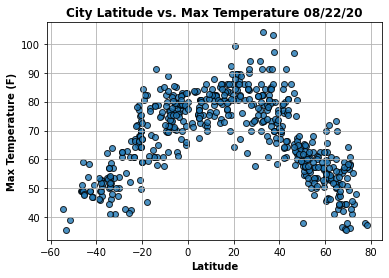

In [83]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"), fontweight="bold")
plt.ylabel("Max Temperature (F)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

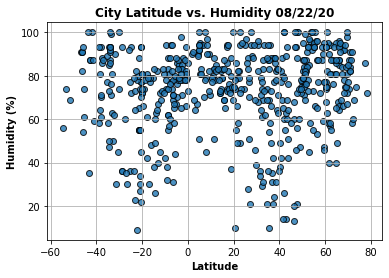

In [84]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"), fontweight="bold")
plt.ylabel("Humidity (%)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png",)
# Show plot.
plt.show()

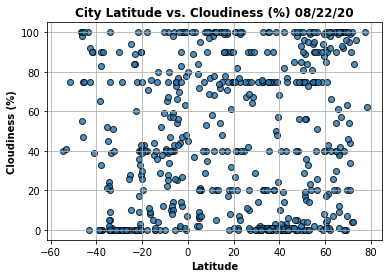

In [85]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"), fontweight="bold")
plt.ylabel("Cloudiness (%)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

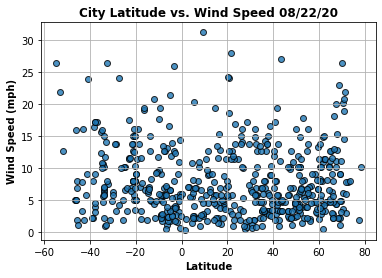

In [86]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"), fontweight="bold")
plt.ylabel("Wind Speed (mph)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [87]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [89]:
index13 = city_data_df.loc[13]
index13

City                        Airai
Country                        TL
Date          2020-08-23 00:26:43
Lat                         -8.93
Lng                        125.41
Max Temp                    69.64
Humidity                       32
Cloudiness                     65
Wind Speed                   5.06
Name: 13, dtype: object

In [90]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
545     True
546     True
547    False
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [92]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Svetlyy,RU,2020-08-23 00:26:40,54.67,20.13,68.00,94,75,6.71
3,Kolchugino,RU,2020-08-23 00:26:41,56.30,39.38,53.53,87,51,2.04
5,Vardo,NO,2020-08-23 00:26:41,70.37,31.11,56.82,87,54,20.13
6,Albany,US,2020-08-23 00:25:02,42.60,-73.97,80.01,55,0,1.99
11,Raudeberg,NO,2020-08-23 00:26:42,61.99,5.14,53.01,94,100,14.85


In [93]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

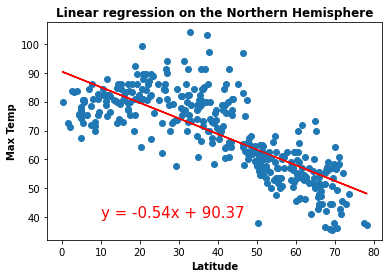

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear regression on the Northern Hemisphere", fontweight="bold")
plt.ylabel("Max Temp", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

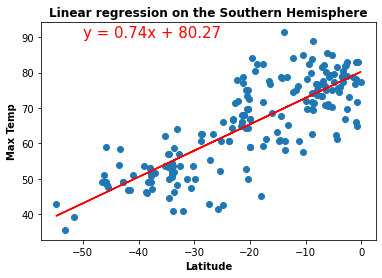

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear regression on the Southern Hemisphere", fontweight="bold")
plt.ylabel("Max Temp", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

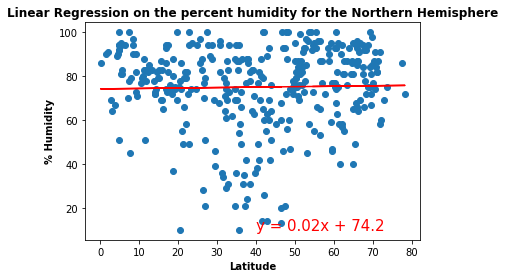

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the percent humidity for the Northern Hemisphere", fontweight="bold")
plt.ylabel("Humidity", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

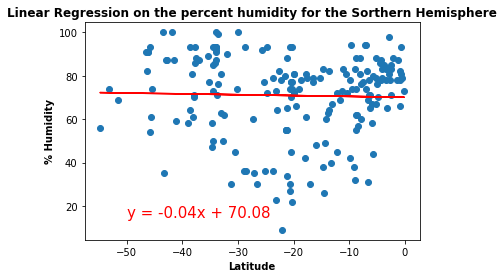

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the percent humidity for the Sorthern Hemisphere", fontweight="bold")
plt.ylabel("Humidity", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

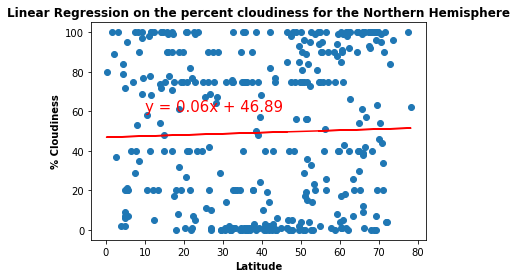

In [112]:
# Linear regression on the Cloudiness Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the percent cloudiness for the Northern Hemisphere", fontweight="bold")
plt.ylabel("Cloudiness", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

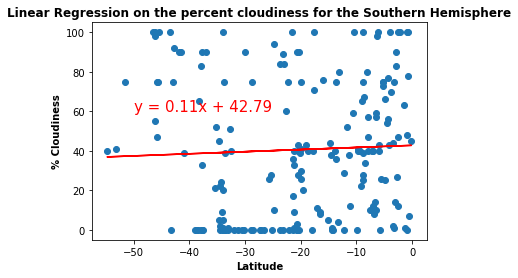

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the percent cloudiness for the Southern Hemisphere", fontweight="bold")
plt.ylabel("Cloudiness", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\ for % Cloudiness', '% Cloudiness',(-50,60))

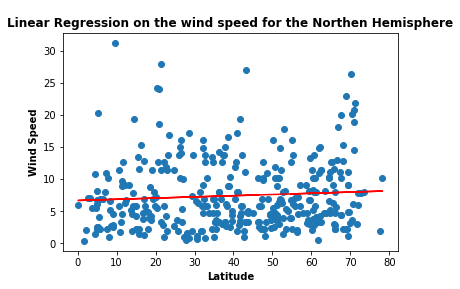

In [130]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the wind speed for the Northen Hemisphere", fontweight="bold")
plt.ylabel("Wind Speed", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

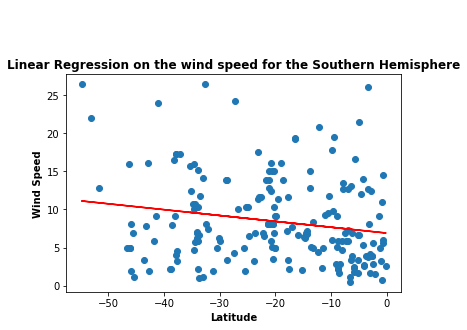

In [131]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the wind speed for the Southern Hemisphere", fontweight="bold")
plt.ylabel("Wind Speed", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))